In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
ds = pd.read_csv('Mall_Customers.csv')

In [114]:
X = ds.iloc[:, [3,4]].values

In [115]:
dbscan = DBSCAN(eps=12, min_samples=10)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=12, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

In [116]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

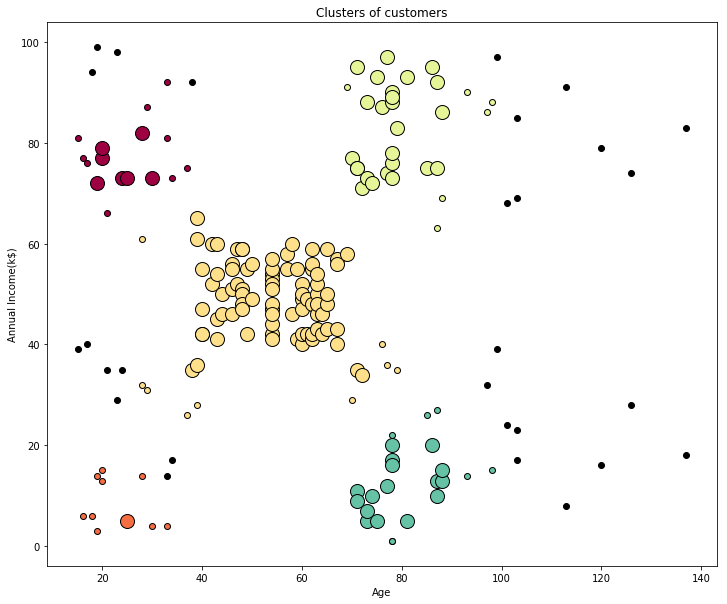

In [118]:
plt.rcParams['figure.figsize'] = 12,10

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)')
plt.show()